In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

cancer = load_breast_cancer()

In [0]:
# ## 한글
# import matplotlib
# from matplotlib import font_manager, rc
# font_loc = "C:/Windows/Fonts/malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_loc).get_name()
# matplotlib.rc('font', family=font_name)

In [0]:
# 중요도 그래프
def plot_feature_importances_cancer(model) :
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)

In [0]:
from sklearn.model_selection import train_test_split

In [21]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
X = cancer.data
Y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   random_state=1)
boost = GradientBoostingClassifier(random_state=0)
boost.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
# tree depth 조절
boost = GradientBoostingClassifier(random_state=0, max_depth=1)
boost.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(boost.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(boost.score(x_test, y_test)))

훈련 세트 정확도: 0.998
테스트 세트 정확도: 0.951


In [25]:
# tree learning_rate(학습률) 조절
boost = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
boost.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(boost.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(boost.score(x_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.937


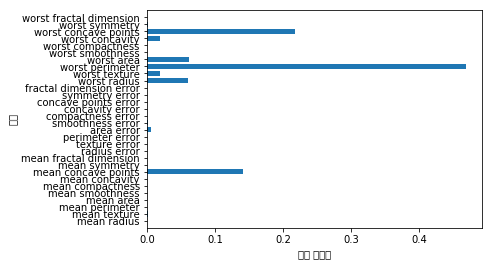

In [31]:
boost = GradientBoostingClassifier(random_state=0, max_depth=1)
boost.fit(x_train,y_train)

plot_feature_importances_cancer(boost)